<a href="https://colab.research.google.com/github/PuruBhatnagar1197/ABtesting/blob/main/Thomson_sampling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
np.random.sedd(2)
num_of_trials=2000
bandit_probab=[0.2, 0.5, 0.75]

In [4]:
class bandit:
    def __init__(self, p):
        self.p=p
        self.a=1
        self.b=1
        self.N=0 ## just to tell how many times a bandit has been used
    def pull(self):
        return np.random.random()<self.p
    def update(self, x):
        self.a+=x
        self.b+=1-x
        self.N+=1
    def sample(self):
        return np.random.beta(self.a,self.b)


In [8]:
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

In [14]:
def experiment():
    rewards=np.zeros(num_of_trials)
    bandits=[bandit(p) for p in bandit_probab]
    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    for i in range(num_of_trials):
        j=np.argmax([b.sample() for b in bandits])
        x=bandits[j].pull()
        rewards[i]=x
        bandits[j].update(x)
        if i in sample_points:
            plot(bandits,i)
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / num_of_trials)
    print("num times selected each bandit:", [b.N for b in bandits])


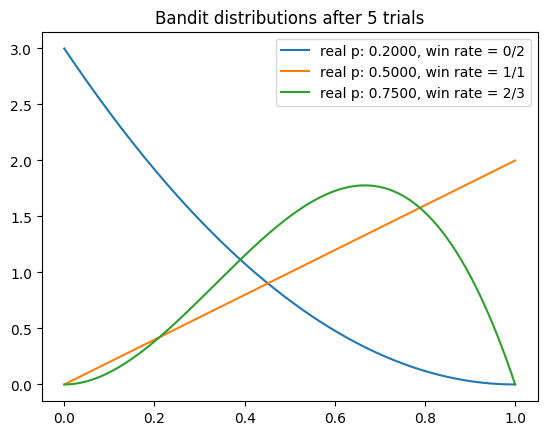

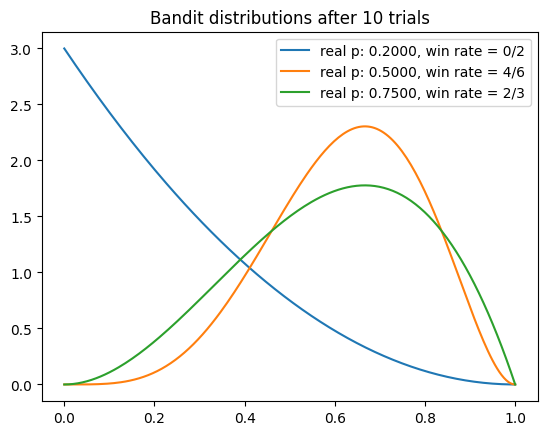

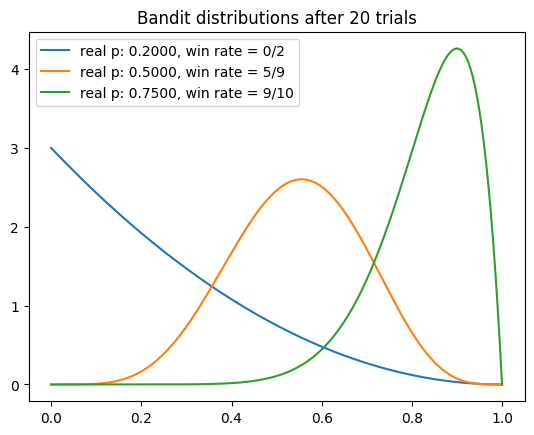

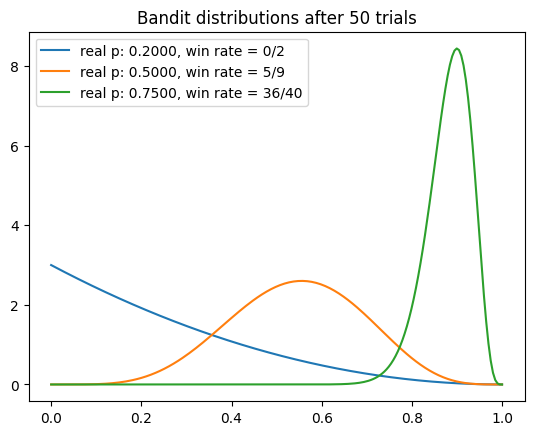

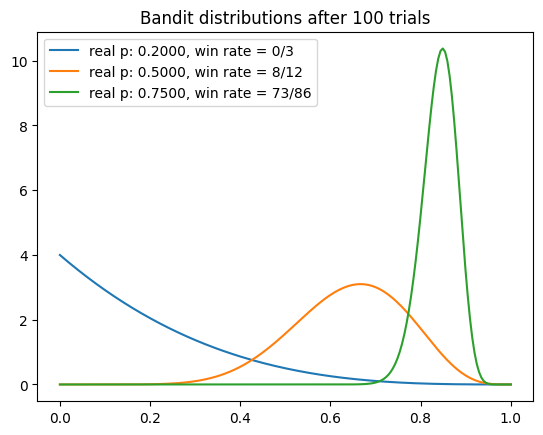

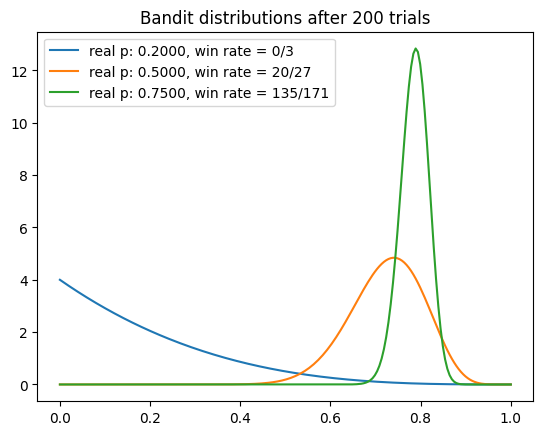

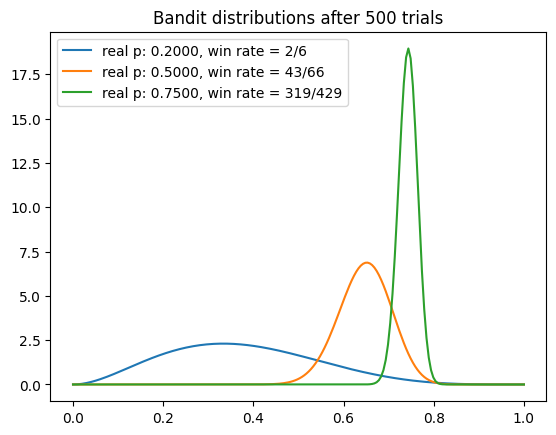

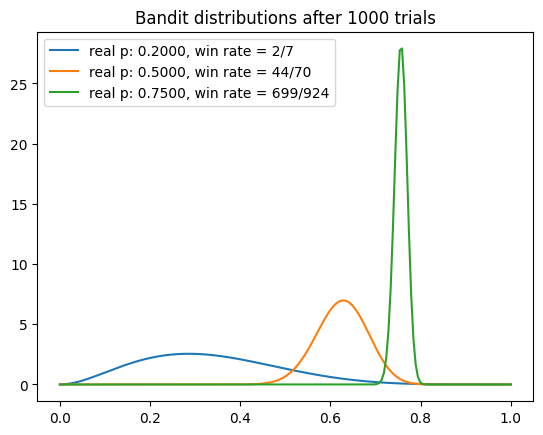

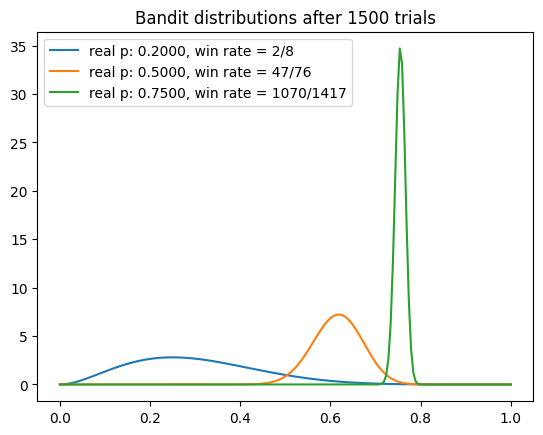

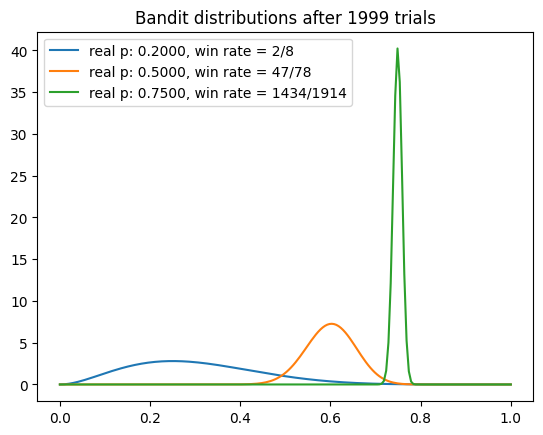

total reward earned: 1483.0
overall win rate: 0.7415
num times selected each bandit: [8, 78, 1914]


In [15]:
experiment()